In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/train.csv')

## EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing age with mean value
df.Age = df.Age.fillna(np.mean(df.Age.fillna(0.0)))

# Fill missing Embarked with mode value
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

# Fill missing Cabin with 'NA' value
df.Cabin = df.Cabin.fillna('NA')

In [7]:
df.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
D              3
              ..
D9             1
E17            1
A20            1
B38            1
C32            1
Name: Cabin, Length: 147, dtype: int64

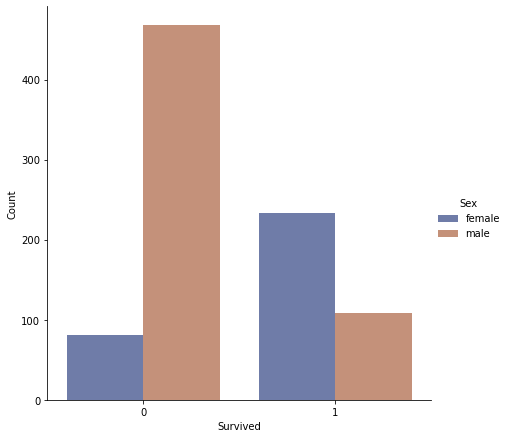

In [20]:
# Distribution of survival in sex
count = df.groupby(['Survived', 'Sex']).size().to_frame('Count').reset_index()

sns.catplot(
    data=count, kind="bar",
    x="Survived", y="Count", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)

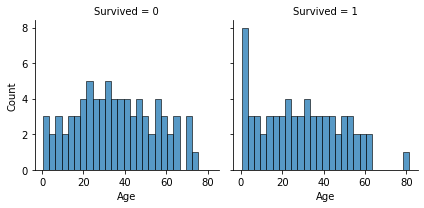

In [26]:
# Distribution of survival among age
count = df.groupby(['Survived', 'Age']).size().to_frame('Count').reset_index()

sns.displot(
    count, x="Age", col="Survived",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

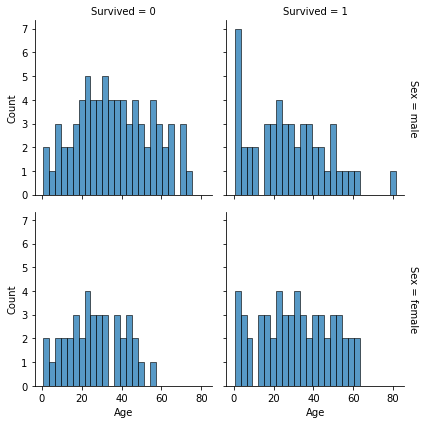

In [27]:
count = df.groupby(['Survived', 'Age', 'Sex']).size().to_frame('Count').reset_index()

sns.displot(
    count, x="Age", col="Survived", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Conclusion: Sex and Age are very important features when determining if a person survived.

In [35]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le_sex = LabelEncoder()
df.Sex = le_sex.fit_transform(df.Sex)

le_cabin = LabelEncoder()
df.Cabin = le_cabin.fit_transform(df.Cabin)

le_embarked = LabelEncoder()
df.Embarked = le_embarked.fit_transform(df.Embarked)

In [40]:
# train test split
from sklearn.model_selection import train_test_split
feat_col = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
train, test = train_test_split(df[feat_col + ['Survived']], stratify=df.Survived)

## Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
lr.fit(train[feat_col], train.Survived)

LogisticRegression()

In [42]:
lr.score(test[feat_col], test.Survived)

0.757847533632287

## Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
score = []
for i in range(10, 100+10, 10):
    print('Number of trees:', i)
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(train[feat_col], train.Survived)
    score.append(rf.score(test[feat_col], test.Survived))

Number of trees: 10
Number of trees: 20
Number of trees: 30
Number of trees: 40
Number of trees: 50
Number of trees: 60
Number of trees: 70
Number of trees: 80
Number of trees: 90
Number of trees: 100


Text(0.5, 0, 'Number of trees')

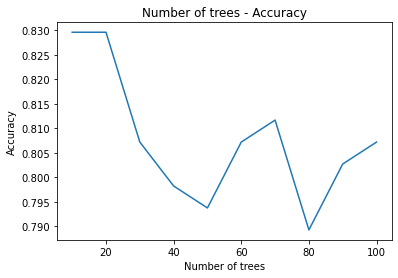

In [47]:
sns.lineplot(range(10, 100+10, 10), score)
plt.title('Number of trees - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')